In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./files_new/auto-mpg_v2.csv')

In [3]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [4]:
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
387,27.0,4,86.0,2790.0
388,44.0,4,52.0,2130.0
389,32.0,4,84.0,2295.0
390,28.0,4,79.0,2625.0


In [5]:
# 예측모델
x = ndf[['cylinders', 'horsepower', 'weight']] # 데이터프레임 형태 / 독립변수
y = ndf['mpg'] # 시리즈 형태 / 종속변수

In [6]:
x

,cylinders,horsepower,weight
0,8,130.0,3504.0
1,8,165.0,3693.0
2,8,150.0,3436.0
3,8,150.0,3433.0
4,8,140.0,3449.0
...,...,...,...
387,4,86.0,2790.0
388,4,52.0,2130.0
389,4,84.0,2295.0
390,4,79.0,2625.0


In [7]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [8]:
# train : 학습
# 예측 학습
# 원본 데이터에서 학습데이터/검증데이터 2개로 분산하여 예측함. 일반적으로 7:3으로 나눠서 사용.
from sklearn.model_selection import train_test_split

In [9]:
# x : 독립변수
# y : 종속변수
# test_size : 검증데이터 비율(나머지는 훈련데이터 비율)
# random_state : 랜덤하게 뽑아내기 위한 시드값
# train : 훈련(학습)데이터
# test : 검증(test)데이터
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size =0.3,
                                                    random_state = 10)

In [10]:
x_train

,cylinders,horsepower,weight
37,8,165.0,4209.0
170,4,71.0,2223.0
275,6,133.0,3410.0
194,4,60.0,2164.0
352,4,100.0,2615.0
...,...,...,...
369,4,74.0,1980.0
320,4,65.0,2110.0
15,6,95.0,2833.0
125,6,100.0,2901.0


In [11]:
x_test

,cylinders,horsepower,weight
241,3,110.0,2720.0
366,4,84.0,2525.0
298,8,90.0,3420.0
341,4,60.0,1760.0
263,8,140.0,4080.0
...,...,...,...
378,4,67.0,1965.0
20,4,87.0,2672.0
187,8,120.0,3962.0
59,4,90.0,2408.0


In [12]:
# 선형회귀분석 모듈
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [20]:
# 학습 모델 만들기
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
# 결정계수(R^2) 조회
lr.score(x_test, y_test)

0.6939048496695597

In [15]:
# # 결정계수(R^2) 조회
# lr.score(x_train, y_train)

0.7071493981431289

In [26]:
# y의 예측값
y_hat = lr.predict(x)

In [27]:
print(len(y_hat))
print(y_hat)

392
[18.43046954 16.14345244 18.04279395 18.05846198 18.34630798 11.53350791
 10.64851363 11.05357053 10.09199907 14.39496987 16.63669615 16.76786181
 16.3454236  17.08516489 28.07012352 24.4486432  24.68249943 26.10483083
 29.59399778 32.69460494 26.8004472  27.95291262 28.05445548 28.12231715
 25.60054305  9.4710991  11.27643241 10.87368749  9.67714524 29.59399778
 28.81987716 28.82218914 25.30225169 20.9122915  21.6724905  22.25919342
 21.88662029 13.4485506  11.74535887 14.1814885  14.59582648  8.99531955
 10.4582681   8.21482855 23.21780447 28.73634746 21.91795636 23.11048993
 29.19823853 29.55627476 30.55500367 30.37916246 32.31273417 32.99979911
 32.17985523 31.17650235 28.56105525 29.91201557 30.20917579 28.06781153
 29.16690246 13.10907653 12.15795043 14.39214204 14.31205545 16.81024194
  9.63707709 12.2897148  12.34425356 11.40759807 28.8221071  15.66125279
 15.32819882 13.93314509 14.69505736 24.50880613 28.04984809 25.19708506
 29.99153659 28.28426988 28.62025112 27.2960029

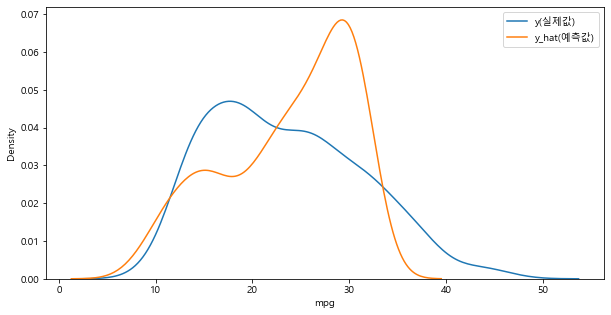

In [28]:
# 예측값과 실제값의 차이를 그래프로 확인

# 글씨체 변경.
# 한글깨짐 방지
plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize = (10, 5))

ax1 = sns.kdeplot(y, label = 'y(실제값)')

ax2 = sns.kdeplot(y_hat, label = 'y_hat(예측값)', ax = ax1)

plt.legend() # 범례 추가

plt.show()

# 정리
1. 독립변수와 종속변수와의 상관관계
 - 단순, 다항, 다중 회귀분석 3가지 모두 사용해서 가장 적절한 모델(= 결정계수가 가장 높은)을 정해야 함.
2. train 데이터를 이용해서 학습(예측)시키기
 - x_train값과 y_train 값을 모두 넣어줍니다.
3. 결정계수값 확인 : 1에 가까울 수록 예측율이 높음
 - lr.score(x_test, y_test)
 - 결정계수는 test값으로 도출해야함
4. 예측(y_hat) 값 구하기 : predict()
 - y_hat = lr.predict(x)
 - 전체 x에 대한 y_hat을 구해야함
5. 그래프 그리기
 - y(실제값), y_hat(예측값)을 한 그래프로 분석.

- 비정형데이터 = 군집분석
- 정형데이터 = 회귀분석(단순, 다항, 다중)

- 스텝아이즈 = 결정계수를 정하는 것. 포워드/스텝아이즈/백워드
- 분석방법은 모든 데이터 분석에서 적어둬야된다. 개념을 정리해뒀다가 익히기
- 탐색적 데이터, 시계열 데이터 등등
- qgis = 지도시각화. 공간 데이터 분석
- 다양한 변수를 가지고 확장하는 것이 중요
- 앱서비스
- 경진대회에서 우수사아1!!!